___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>


# AutoEncoders on Image Data

## The Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

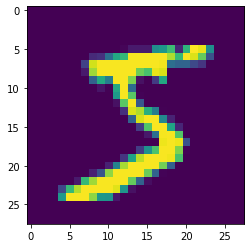

In [12]:
plt.imshow(X_train[0])

In [8]:
X_train = X_train/255
X_test = X_test/255

## Basic AutoEncoder

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [30]:
783/2

391.5

In [31]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [32]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [33]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [34]:
autoencoder.fit(X_train, X_train, epochs=5,validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 293us/sample - loss: 0.2496 - accuracy: 0.7914 - val_loss: 0.2133 - val_accuracy: 0.7952
Epoch 2/5
60000/60000 [==============================] - 17s 279us/sample - loss: 0.1872 - accuracy: 0.7977 - val_loss: 0.1687 - val_accuracy: 0.8013
Epoch 3/5
60000/60000 [==============================] - 16s 274us/sample - loss: 0.1620 - accuracy: 0.8019 - val_loss: 0.1555 - val_accuracy: 0.8021
Epoch 4/5
60000/60000 [==============================] - 17s 277us/sample - loss: 0.1517 - accuracy: 0.8033 - val_loss: 0.1605 - val_accuracy: 0.7970
Epoch 5/5
60000/60000 [==============================] - 18s 305us/sample - loss: 0.1442 - accuracy: 0.8046 - val_loss: 0.1385 - val_accuracy: 0.8053


In [35]:
passed_images = autoencoder.predict(X_test[:10])

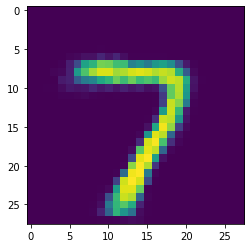

In [36]:
plt.imshow(passed_images[0])

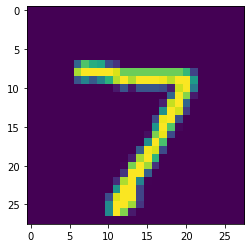

In [37]:
plt.imshow(X_test[0])

# AutoEncoders for Denoising Images

In [5]:
from tensorflow.keras.layers import GaussianNoise

In [50]:
sample = GaussianNoise(0.2)

In [51]:
noisey = sample(X_test[0:2],training=True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



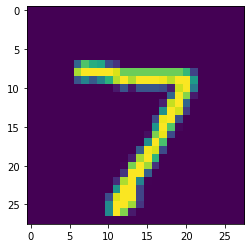

In [52]:
plt.imshow(X_test[0])

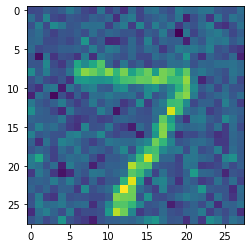

In [53]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

In [37]:
import tensorflow as tf
import numpy as np

In [54]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [55]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [60]:
noise_remover = Sequential([encoder, decoder])

In [61]:
noise_remover.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

In [62]:
noise_remover.fit(X_train, X_train, epochs=8,
                           validation_data=[X_test, X_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/8
60000/60000 [==============================] - 12s 202us/sample - loss: 0.1079 - accuracy: 0.8117 - val_loss: 0.1030 - val_accuracy: 0.8112
Epoch 2/8
60000/60000 [==============================] - 17s 284us/sample - loss: 0.1061 - accuracy: 0.8119 - val_loss: 0.1028 - val_accuracy: 0.8114
Epoch 3/8
60000/60000 [==============================] - 19s 313us/sample - loss: 0.1046 - accuracy: 0.8121 - val_loss: 0.1004 - val_accuracy: 0.8118
Epoch 4/8
60000/60000 [==============================] - 18s 301us/sample - loss: 0.1035 - accuracy: 0.8123 - val_loss: 0.0990 - val_accuracy: 0.8120
Epoch 5/8
60000/60000 [==============================] - 18s 298us/sample - loss: 0.1025 - accuracy: 0.8124 - val_loss: 0.0989 - val_accuracy: 0.8120
Epoch 6/8
60000/60000 [==============================] - 18s 296us/sample - loss: 0.1016 - accuracy: 0.8126 - val_loss: 0.0979 - val_accuracy: 0.8120
Epoch 7/8
60000/60000 [===========================

In [72]:
ten_noisey_images = sample(X_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

The Original


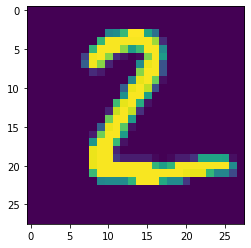

The Noisey Version


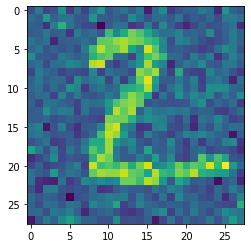

After going through denoiser


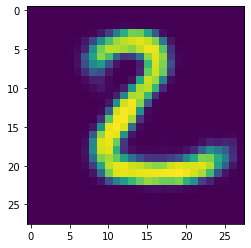

In [74]:
n = 1
print("The Original")
plt.imshow(X_test[n])
plt.show()
print("The Noisey Version")
plt.imshow(ten_noisey_images[n])
plt.show()
print("After going through denoiser")
plt.imshow(denoised[n])
plt.show()